# Book Recommendation System

# Part II: Exploratory Data Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import ast

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from IPython.display import Image # to display images

In [2]:
# To configure the LaTeX font
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] 

In [3]:
# Custom colors
custom_blue = '#648fff'
custom_purple = '#775EF0'
custom_pink = '#e466b3'
custom_magenta = '#dc267f'

## Loading the Data

In [4]:
books = pd.read_csv("data/Books_cleaned.csv").drop('Unnamed: 0', axis = 1)
#ratings = pd.read_csv("data_cleaned/Ratings_cleaned.csv").drop('Unnamed: 0', axis = 1)

ratings_files = [f'data/Ratings_cleaned_part_{i}.csv' for i in range(1,6+1)]
ratings_dfs = [pd.read_csv(file) for file in ratings_files]
ratings = pd.concat(ratings_dfs, ignore_index=True).drop('Unnamed: 0', axis = 1)

books_genres = pd.read_csv("data/Books_genres_cleaned.csv").drop('Unnamed: 0', axis = 1)
books_genres_list = pd.read_csv("data/Books_genres_list_cleaned.csv").drop('Unnamed: 0', axis = 1)

## Exploratory Data Analysis

### Ratings distribution

We start by representing the distribution of ratings.

/tmp/ipykernel_9062/1952618803.py:9: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = 'Rating', hue='Rating', data = ratings, palette=[custom_blue], legend=False)


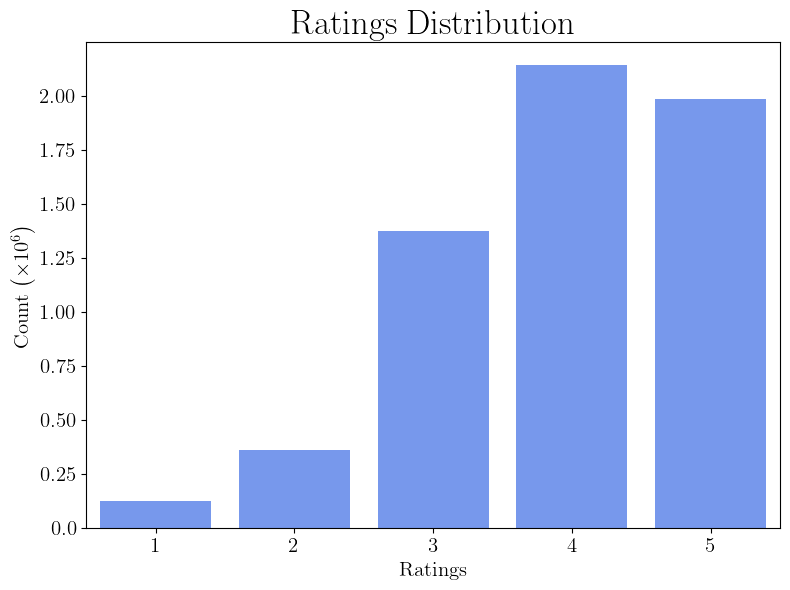

In [5]:
def format_ticks(value, _):
    if value >= 100000:
        formatted_value = "{:.2f}".format(value / 1000000)
        return f"{formatted_value}"
    else:
        return str(value)
        
plt.figure(figsize = (8,6))
sns.countplot(x = 'Rating', hue='Rating', data = ratings, palette=[custom_blue], legend=False)

plt.title('Ratings Distribution',size = 25)
plt.xlabel('Ratings',size = 15)
plt.ylabel(r'Count $\left( \times 10^6 \right)$', size = 15)

XTicks = range(1, 5+1, 1)
plt.gca().yaxis.set_major_formatter(format_ticks)
plt.xticks(ticks = range(len(XTicks)), labels = XTicks, size = 15)
plt.yticks(size = 15)

plt.tight_layout()

plt.show()

Analyzing the distribution of ratings, we infer that users use to give high ratings to the books they have read. One plausible explanation for this phenomenon could be that people tend to select books they anticipate will be enjoyable. Unlikely with movies, where the time investment is typically shorter, reading a book often requires a significant amount of time. Consequently, readers are less inclined to invest their time in books they suspect they may not enjoy. Nevertheless, this is a conjecture. Other factors could be contributing to this pattern as well.

### Ratings per user

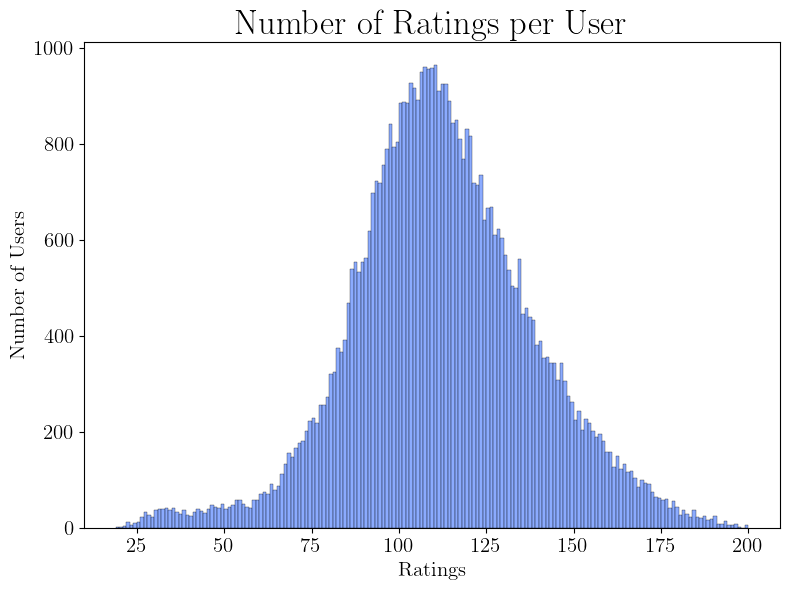

In [6]:
ratings_per_user = ratings.groupby('UserID').size()

number_bins = (ratings_per_user.max() - ratings_per_user.min())

plt.figure(figsize = (8,6))
sns.histplot(ratings_per_user, color=custom_blue, bins=number_bins, legend=False)

plt.title('Number of Ratings per User',size = 25)
plt.xlabel('Ratings',size = 15)
plt.ylabel('Number of Users', size = 15)

def format_func(value, tick_number):
    return int(value)
    
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.tight_layout()

plt.show()

After filtering the ratings, all users have at least 10 ratings (indeed, the minimum is 19). Also, it can be seen that there are users with nearly 200 ratings. We can explore below whether users with different amounts of ratings tend to rate books differently or not.

### Mean Rating Distribution per User

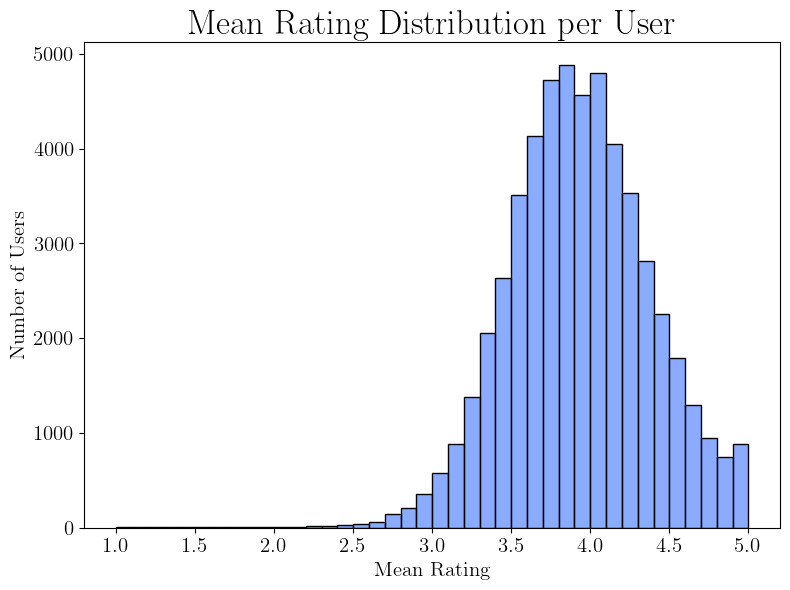

In [7]:
mean_rating_per_user = ratings.groupby('UserID')['Rating'].mean()

number_bins = (5 - 1) * 10

plt.figure(figsize = (8,6))
sns.histplot(mean_rating_per_user, color=custom_blue, bins=number_bins, legend=False)

plt.title('Mean Rating Distribution per User',size = 25)
plt.xlabel('Mean Rating',size = 15)
plt.ylabel('Number of Users', size = 15)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.tight_layout()

plt.show()

People do not follow a unique tendency when it come to rating something, Some are generous, giving the maximum mark to something mediocre, while others reserve the highest rating for only the perfect readings. These tendencies are illustrated in the figure above. On the right side, there is small bump from users with a mean rating of 5, indicating they have absolutely loved all the books they have read or they have only rated the perfect books they read. Conversely, we see the opposite side of the spectrum in the left side of the figure. In this regime, users who systematically give the lower marks (1 or 2) to the books reside, although they are nearly nonexistent. 

Understanding these tendencies is crucial for collaborative filtering. When working with collaborative filtering techniques, normalization can help mitigating the biases of users who may have different rating scales. Some common normalization techniques are:

1. **Mean-Centering** (User Mean Normalization): For each user's rating, subtract the user's average rating from each of their ratings. This helps to account for differences in user rating scales.

    r_{ui}' = r_{ui} - \bar{r}_u

    where r_{ui} is the original rating by user \( u \) for item \( i \), and \bar{r}_u is the average rating given by user \( u \).

2. **Z-score Normalization**: This methid involves scaling the ratings based on the user's mean and standard deviation. It helps addressing both the mean and variance differences in user ratings.

    r_{ui}' = (r_{ui} - \bar{r}_u) ÷ sigma_u

    where sigma_u  is the standard deviation of the user's ratings.

3. **Min-Max Normalization**: This technique scales the ratings to a fixed range, typically [0, 1] or [-1, 1].

    r_{ui}' = (r_{ui} - \min(r_u)) ÷ (\max(r_u) - \min(r_u))

    where \min(r_u) and \max(r_u) are the minimum and maximum ratings given by user \( u \), respectively.

### Ratings per Books

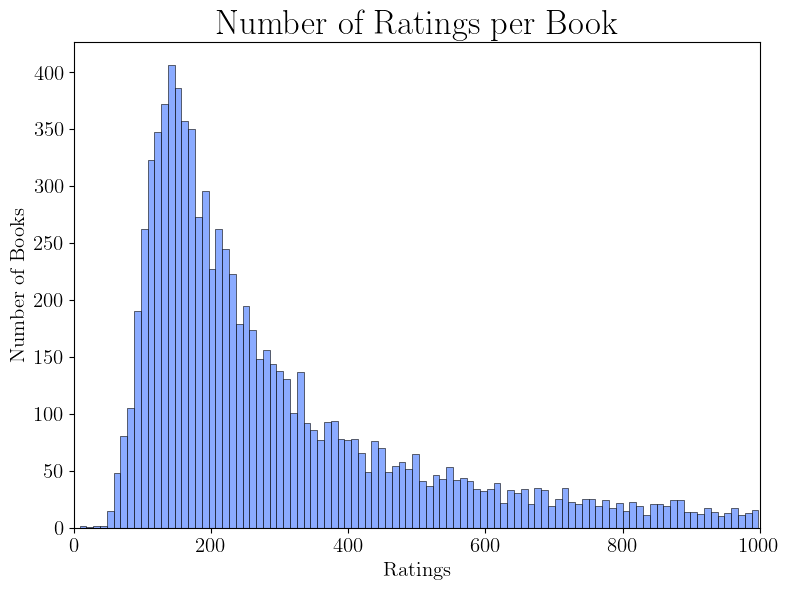

In [8]:
ratings_per_book = ratings.groupby('BookID').size().values
ratings_per_book = ratings_per_book[ratings_per_book < 1000]
# I just keep the counts lower than 1000 in order to have a cleaner histogram

number_bins = 100

plt.figure(figsize = (8,6))
sns.histplot(ratings_per_book, color=custom_blue, bins=number_bins, legend=False)

plt.title('Number of Ratings per Book',size = 25)
plt.xlabel('Ratings',size = 15)
plt.ylabel('Number of Books', size = 15)

plt.xlim(0, 1000)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.tight_layout()

plt.show()

We can see that most books concentrate in the region of 100-200 ratings.

### Mean Rating Distribution per Book

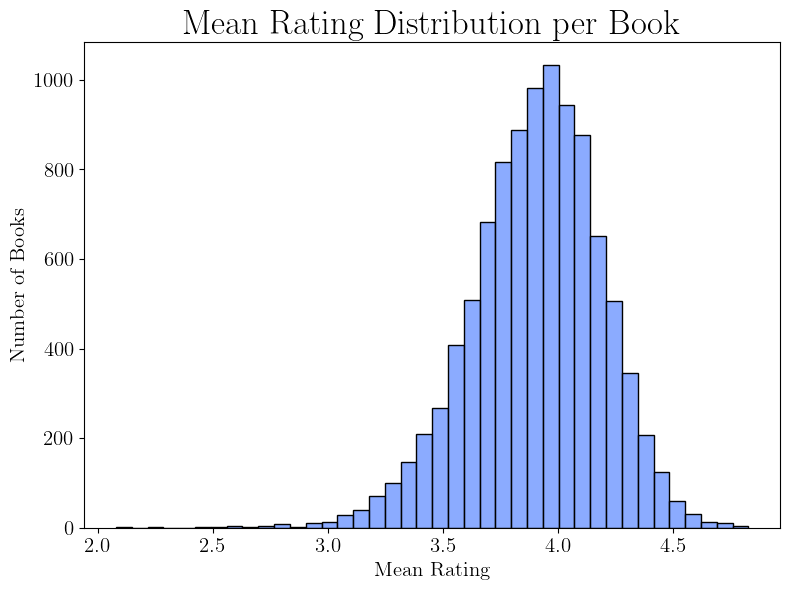

In [9]:
mean_rating_per_book = ratings.groupby('BookID')['Rating'].mean()

number_bins = (5 - 1) * 10

plt.figure(figsize = (8,6))
sns.histplot(mean_rating_per_book, color=custom_blue, bins=number_bins, legend=False)

plt.title('Mean Rating Distribution per Book',size = 25)
plt.xlabel('Mean Rating',size = 15)
plt.ylabel('Number of Books', size = 15)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.tight_layout()

plt.show()

The mean rating distribution per book does not reveal new information. Since users tend to give high ratings to the books they have read, most of the books concentrate close to the 4 mean rating.

### Genres Distribution

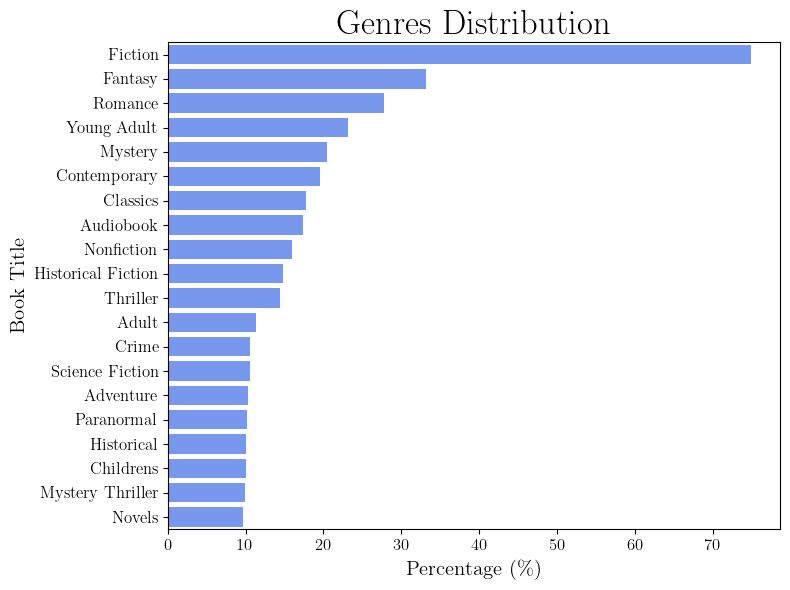

In [10]:
genres, genres_counts = np.unique(books_genres_list['Genre'], return_counts=True)
genres_counts_df = pd.merge(pd.DataFrame(genres, columns=['Genre']), pd.DataFrame(genres_counts, columns=['Count']), left_index=True, right_index=True)

genres_counts_df_sorted = genres_counts_df.sort_values(by='Count', ascending=False).head(20)

total_number_books = books.shape[0]
genres_counts_df_sorted['Percentage'] = genres_counts_df_sorted['Count'] / books.shape[0] * 100

plt.figure(figsize = (8,6))
sns.barplot(x='Percentage', y='Genre', data=genres_counts_df_sorted, color=custom_blue)

plt.title('Genres Distribution',size = 25)
plt.xlabel(r'Percentage $\left( \% \right)$',size = 15)
plt.ylabel('Book Title', size = 15)

plt.xticks(size = 12)
plt.yticks(size = 12)

plt.tight_layout()

plt.show()

Note that some of the percentages is NOT equal to 100. This is because each book may have several genres. For example, the plot indicates that about a 35% of the books are fantasy books.

We can redo the plot but this time selecting the genres we are interested in.

In [11]:
list(filter(lambda s: 'Hard' in s, genres))

['Hard Boiled', 'Hard Science Fiction']

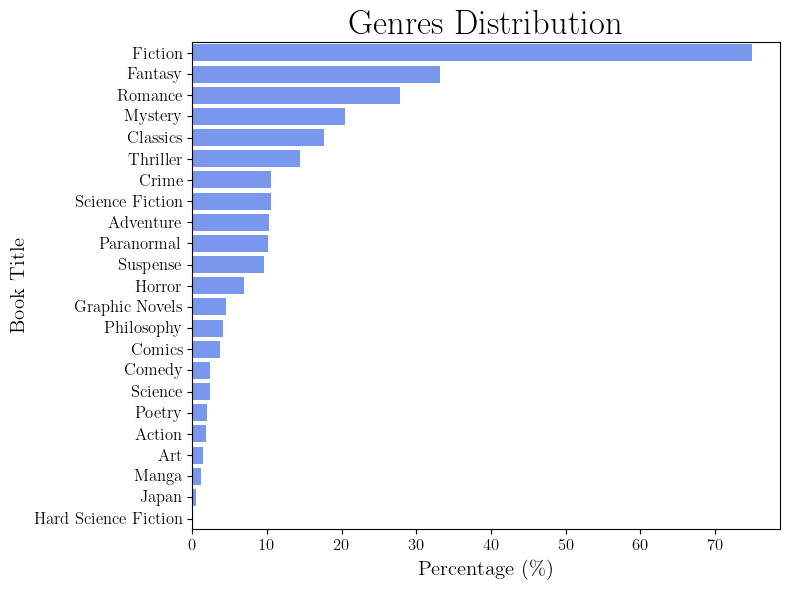

In [12]:
genres, genres_counts = np.unique(books_genres_list['Genre'], return_counts=True)
genres_counts_df = pd.merge(pd.DataFrame(genres, columns=['Genre']), pd.DataFrame(genres_counts, columns=['Count']), left_index=True, right_index=True)

genres_interest = ["Action", "Adventure", "Art", "Classics", "Comedy", "Comics", 
                   "Crime", "Fantasy", "Fiction", "Graphic Novels", "Japan", 
                   "Hard Science Fiction", "Horror", "Manga", "Mystery", 
                   "Paranormal", "Philosophy", "Poetry", "Romance", "Science", 
                   "Science Fiction", "Suspense", "Thriller"]

genres_counts_df = genres_counts_df[genres_counts_df['Genre'].isin(genres_interest)]

genres_counts_df_sorted = genres_counts_df.sort_values(by='Count', ascending=False)

total_number_books = books.shape[0]
genres_counts_df_sorted['Percentage'] = genres_counts_df_sorted['Count'] / books.shape[0] * 100

plt.figure(figsize = (8,6))
sns.barplot(x='Percentage', y='Genre', data=genres_counts_df_sorted, color=custom_blue)

plt.title('Genres Distribution',size = 25)
plt.xlabel(r'Percentage $\left( \% \right)$',size = 15)
plt.ylabel('Book Title', size = 15)

plt.xticks(size = 12)
plt.yticks(size = 12)

plt.tight_layout()

plt.show()

We see that most books are "Fantasy", "Romance", or "Mistery" books, exluding "Fiction", while there are few "Hard Science Fiction" or "Japan" books in the dataset.


### Rating Distribution per Genre

In order to see the difference in ratings by genre, I start by considering only those genres for which there are, at least, 50 books.

After that, I select some of the genres I am interested in and I get the mean average rating.

In [13]:
print('Total number of genres: ', genres_counts.shape[0])

uncommon_genres = []

for index, count in enumerate(genres_counts):
    if count < 50:
        uncommon_genres.append(genres[index])

print('Total number of uncommon genres: ', len(uncommon_genres))

Total number of genres:  564
Total number of uncommon genres:  405


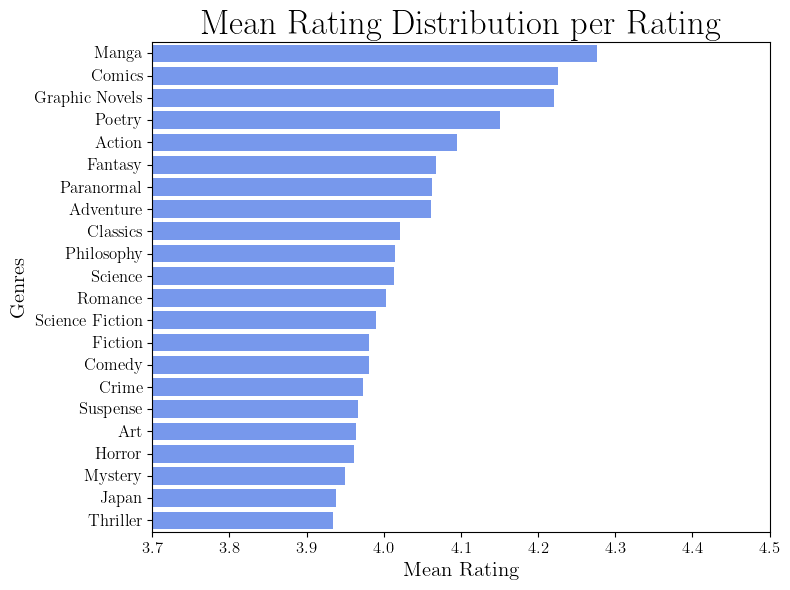

In [14]:
books_common_genres_list = books_genres_list[~books_genres_list['Genre'].isin(uncommon_genres)]

genres_interest = ["Action", "Adventure", "Art", "Classics", "Comedy", "Comics", 
                   "Crime", "Fantasy", "Fiction", "Graphic Novels", "Japan", 
                   "Hard Science Fiction", "Horror", "Manga", "Mystery", 
                   "Paranormal", "Philosophy", "Poetry", "Romance", "Science", 
                   "Science Fiction", "Suspense", "Thriller"]

books_common_genres_list = books_common_genres_list[books_common_genres_list['Genre'].isin(genres_interest)]

books_genres_average_rating = pd.merge(books_common_genres_list, books[['Goodreads_BookID', 'Average_Rating']], on='Goodreads_BookID', how='left')
books_genres_average_rating_group = pd.DataFrame(books_genres_average_rating.groupby('Genre')['Average_Rating'].mean(), columns=['Average_Rating']).reset_index()
books_genres_average_rating_group_sorted = books_genres_average_rating_group.sort_values(by='Average_Rating', ascending=False)

plt.figure(figsize = (8,6))
sns.barplot(x='Average_Rating', y='Genre', data=books_genres_average_rating_group_sorted, color=custom_blue)

plt.title('Mean Rating Distribution per Rating',size = 25)
plt.xlabel('Mean Rating',size = 15)
plt.ylabel('Genres', size = 15)

plt.xlim(3.7, 4.5)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.tight_layout()

plt.show()

It seems that some genres tend to be better rated than others. In particular, comic books like "Manga", "Comics" or "Graphic Novels" are the one with the highest average ratings.

### Years Distribution

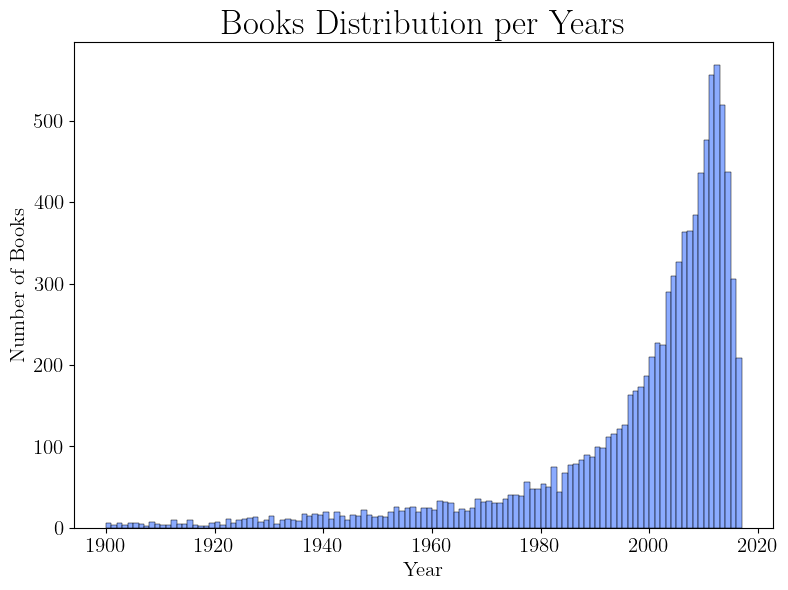

In [15]:
year_counts = pd.DataFrame(books.groupby(['Year']).size(), columns=['Count']).reset_index()
year_counts = year_counts[year_counts['Year'] >= 1900]
year_counts.reset_index(drop=True, inplace=True)
year_counts_array = []
for index, row in year_counts.iterrows():
    year = int(row['Year'])
    count = int(row['Count'])
    year_counts_array.extend([year]*count)

number_bins = int(year_counts['Year'].max() - year_counts['Year'].min())

plt.figure(figsize = (8,6))
sns.histplot(year_counts_array, color=custom_blue, bins=number_bins, legend=False)

plt.title('Books Distribution per Years',size = 25)
plt.xlabel('Year',size = 15)
plt.ylabel('Number of Books', size = 15)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.tight_layout()

plt.show()

This dataset contains the 10000 most popular books on Goodreads up to 2017. The figure above reveals a tendency for people to focus more on recent books rather than those from past decades or centuries.

### Top Rated Books

In [17]:
top_10 = books.sort_values(by='Average_Rating', ascending=False).head(10)

for i, row in top_10.iterrows():
    url = row["Image_url"]
    img = Image(url=url, width=100)

    print('  Title: {}'.format(row['Title']))
    print('  Average Rating: {}'.format(row['Average_Rating']))
    print('  Ratings Count: {}'.format(row['Ratings_Count']))
    display(img)
    print('')

  Title: The Complete Calvin and Hobbes
  Average Rating: 4.82
  Ratings Count: 28900



  Title: Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)
  Average Rating: 4.77
  Ratings Count: 33220



  Title: Words of Radiance (The Stormlight Archive, #2)
  Average Rating: 4.77
  Ratings Count: 73572



  Title: Mark of the Lion Trilogy
  Average Rating: 4.76
  Ratings Count: 9081



  Title: ESV Study Bible
  Average Rating: 4.76
  Ratings Count: 8953



  Title: It's a Magical World: A Calvin and Hobbes Collection
  Average Rating: 4.75
  Ratings Count: 22351



  Title: There's Treasure Everywhere: A Calvin and Hobbes Collection
  Average Rating: 4.74
  Ratings Count: 16766



  Title: Harry Potter Boxset (Harry Potter, #1-7)
  Average Rating: 4.74
  Ratings Count: 190050



  Title: Harry Potter Collection (Harry Potter, #1-6)
  Average Rating: 4.73
  Ratings Count: 24618



  Title: The Indispensable Calvin and Hobbes
  Average Rating: 4.73
  Ratings Count: 14597


Apparently, users seem to like Calvin and Hobbes in general, and compilations or collections of books. This makes a lot of sense intuitively. People will not get interested in an entire compilation if they did not like the individual books.

### Most Popular Authors

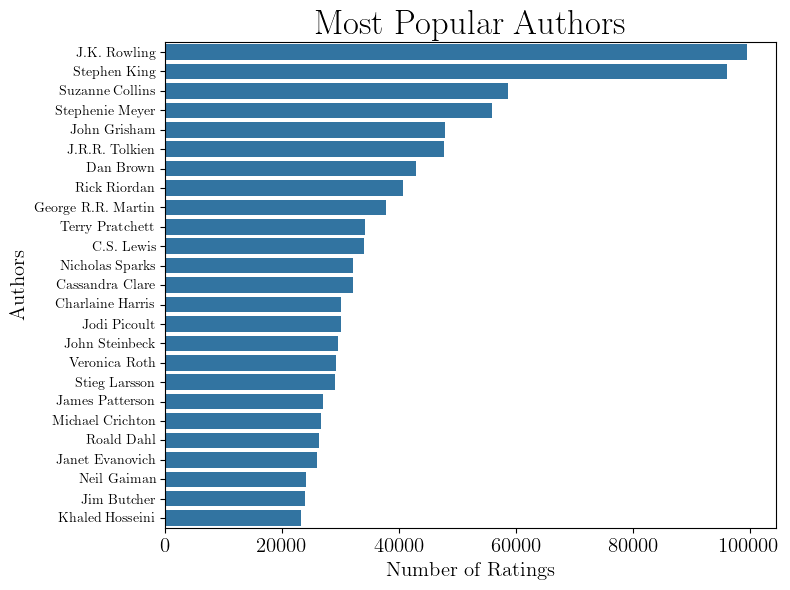

In [18]:
ratings_counts = pd.merge(books[['BookID','Authors']], ratings[['BookID','Rating']], on='BookID', how='right')
ratings_counts = ratings_counts['Authors'].value_counts().head(25).reset_index()
ratings_counts.loc[0, 'Authors'] = 'J.K. Rowling'
ratings_counts.loc[17, 'Authors'] = 'Stieg Larsson'
ratings_counts.loc[20, 'Authors'] = 'Roald Dahl'

plt.figure(figsize = (8,6))
sns.barplot(x='count', y='Authors', data=ratings_counts)

plt.title('Most Popular Authors',size = 25)
plt.xlabel('Number of Ratings',size = 15)
plt.ylabel('Authors', size = 15)

plt.xticks(size = 15)

plt.tight_layout()

plt.show()

By looking at the authors that were rated the most, we can get an impression of the popularity of an author. You can see above the top popular authors.

### Most Popular Books

In [19]:
top_10_popular = books.sort_values(by='Ratings_Count', ascending=False).head(10)

for i, row in top_10_popular.iterrows():
    url = row["Image_url"]
    img = Image(url=url, width=100)

    print('  Title: {}'.format(row['Title']))
    print('  Average Rating: {}'.format(row['Average_Rating']))
    print('  Ratings Count: {}'.format(row['Ratings_Count']))
    display(img)
    print('')

  Title: The Hunger Games (The Hunger Games, #1)
  Average Rating: 4.34
  Ratings Count: 4780653



  Title: Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
  Average Rating: 4.44
  Ratings Count: 4602479



  Title: Twilight (Twilight, #1)
  Average Rating: 3.57
  Ratings Count: 3866839



  Title: To Kill a Mockingbird
  Average Rating: 4.25
  Ratings Count: 3198671



  Title: The Great Gatsby
  Average Rating: 3.89
  Ratings Count: 2683664



  Title: The Fault in Our Stars
  Average Rating: 4.26
  Ratings Count: 2346404



  Title: The Hobbit
  Average Rating: 4.25
  Ratings Count: 2071616



  Title: The Catcher in the Rye
  Average Rating: 3.79
  Ratings Count: 2044241



  Title: Pride and Prejudice
  Average Rating: 4.24
  Ratings Count: 2035490



  Title: Angels & Demons  (Robert Langdon, #1)
  Average Rating: 3.85
  Ratings Count: 2001311


In the list above, you can see the top 10 most popular books according to number of ratings.

### Correlation between columns

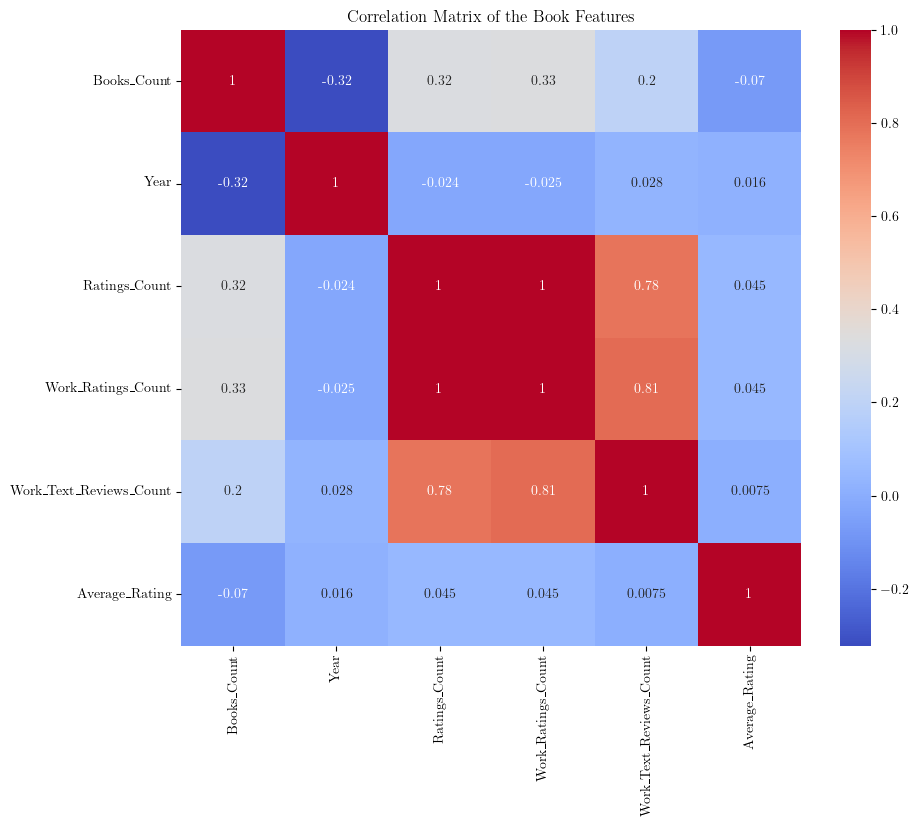

In [20]:
selected_columns = books[['Books_Count', 'Year', 'Ratings_Count', 'Work_Ratings_Count', 'Work_Text_Reviews_Count', 'Average_Rating']]
corr_matrix = selected_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of the Book Features')
plt.show()

In [21]:
print(corr_matrix)

                         Books_Count      Year  Ratings_Count  \
Books_Count                 1.000000 -0.321802       0.324235   
Year                       -0.321802  1.000000      -0.024443   
Ratings_Count               0.324235 -0.024443       1.000000   
Work_Ratings_Count          0.333664 -0.025483       0.995068   
Work_Text_Reviews_Count     0.198698  0.027661       0.779635   
Average_Rating             -0.069888  0.015754       0.044990   

                         Work_Ratings_Count  Work_Text_Reviews_Count  \
Books_Count                        0.333664                 0.198698   
Year                              -0.025483                 0.027661   
Ratings_Count                      0.995068                 0.779635   
Work_Ratings_Count                 1.000000                 0.807009   
Work_Text_Reviews_Count            0.807009                 1.000000   
Average_Rating                     0.045042                 0.007481   

                         Average_Rating

In the previous correlation matrix, we can try to find any associations of features with a book's rating. 

It can be seen that the correlations between the Average_Rating and the other columns range from -0.025 to 0.027, indicating very weak or no correlation with other variables. This suggests that the average rating of the books is almost independent of the rest of the features and depends mostly on other features such as the quality of the book itself or the popularity of the author.

Although one may initially think that, for instance, the popularity of a book (in terms of the number of ratings) could be associated with the average rating it receives, such that once a book is becoming popular it gets better ratings, the date shows that this is not true.

### Correlation between a user's mean rating and its number of ratings

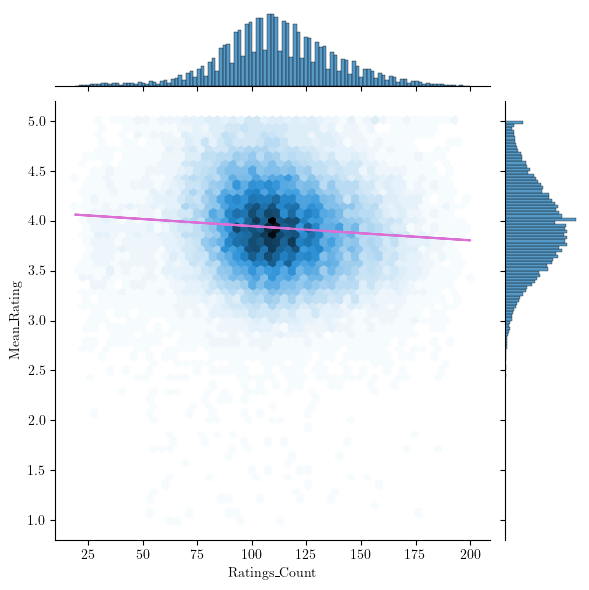

In [22]:
users_count = ratings.groupby('UserID').agg(Mean_Rating=('Rating', 'mean'), Ratings_Count=('Rating', 'size')).reset_index()

sns.jointplot(data=users_count, x='Ratings_Count', y='Mean_Rating', kind='hex', bins=50)
plt.plot(users_count['Ratings_Count'], np.poly1d(np.polyfit(users_count['Ratings_Count'], users_count['Mean_Rating'], 1))(users_count['Ratings_Count']), color='orchid')
plt.show()

It is likely that users who rate books more frequently (frequent raters) rate books differently from less frequent raters. The figure above explores this possibility. It shows that frequent raters tend to give slightly lower ratings to books, possibly because they become more critical as they read and rate more.

### Difference between original and sequel

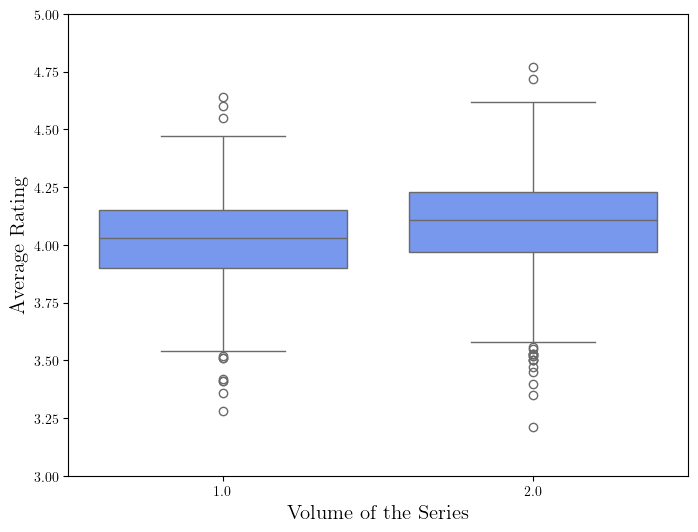

In [23]:
books['Series'] = books['Title'].str.extract(r'(\(.*\))')[0]
books['Series_Number'] = books['Series'].str.extract(r', #(\d+)\)$').astype(float)
books['Series_Name'] = books['Series'].str.extract(r'\((.*?),')[0]

# Filter for series with first two volumes
seq_ratings = books.dropna(subset=['Series_Name', 'Series_Number'])
seq_ratings = seq_ratings[seq_ratings['Series_Number'].isin([1, 2])]
seq_ratings = seq_ratings.groupby(['Series_Name', 'Series_Number']).agg(
    Mean=('Average_Rating', 'mean')).reset_index()

seq_ratings = seq_ratings.groupby('Series_Name').filter(lambda x: len(x) == 2)

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(data=seq_ratings, x='Series_Number', y='Mean', color=custom_blue)
plt.xlabel('Volume of the Series', size=15)
plt.ylabel('Average Rating', size=15)
plt.ylim(3, 5)
plt.show()

Taking a look to the average ratings of the original book of a series and its sequel, we can conclude that there is no significant difference in the ratings.

### Is the length of a book important?

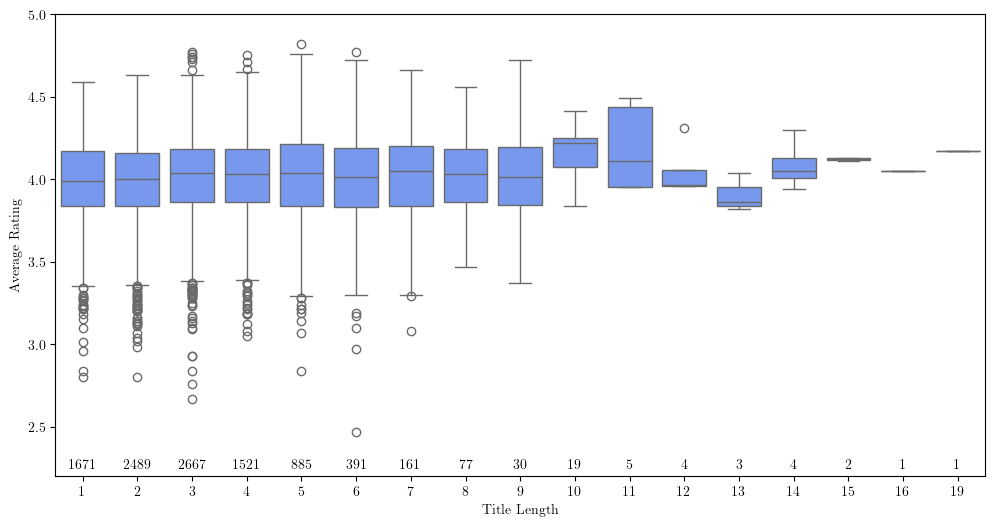

In [24]:
# Calculate title length
books['Title_Cleaned'] = books['Title'].str.extract(r'([0-9a-zA-Z\s\',\.\*]*)')[0].str.strip()
books['Title_Length'] = books['Title_Cleaned'].apply(lambda x: len(x.split()))

# Group by title length and calculate counts
aux = books.groupby('Title_Length').size().reset_index(name='Count') # The titles with length 0 are written with non-romanic characters and the words are extracted in the first step 

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=books[books['Title_Length'] > 0], x='Title_Length', y='Average_Rating', color=custom_blue)
for idx, row in aux.iterrows():
    if idx != 0:
        plt.text(idx-1, 2.25, str(int(row['Count'])), horizontalalignment='center')
plt.xlabel('Title Length')
plt.ylabel('Average Rating')
plt.ylim(2.2, 5)
plt.show()

The title of a book is one of the most important decision an author has to make. It needs to be eye-catching and concise, as brevity is the soul of wit. The plot above examines this statement. However, the length of the title does not appear to be a significant factor when predicting the rating of a book.

### Summary of the Part 2: Exploratory Data Analysis

In this part of the project, we identified interesting aspects of the books datasets. In summary, the main conclusion is that the effects on book rating from the numerical features in the dataset are rather small, suggesting that book ratings are mainly driven by other aspects, such as the books' quality.